<a href="https://colab.research.google.com/github/CQNKZX/Thesis/blob/master/interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Simulate when the control set is an interval.
import time
import math
import numpy as np
import matplotlib.pyplot as plt

time step length is 0.0005
space step length is 0.1


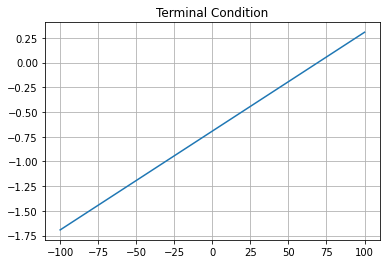

In [ ]:
# FDM parameters
T = 0.2 # horizon [0, T]
X = 100 # price range will be [-X, X]
Nt = 400 # number of time steps
Nx = 1000 # number of price grid on one side(2*Nx grid in total)
dt = T / Nt # time step
dx = X / Nx # price step
print("time step length is", dt)
print("space step length is", dx)

# prior parameters of the drift
m0 = 0.03
s0 = 0.3
# market parameters
vol = 0.3 # volatility
r = 0.01 # interest rate
gamma = 0.5 # utility function exponent

# control set
low, high = 2, 2

# data initialization
B = np.zeros((2*Nx + 1, Nt + 1))
# fill data at time T
for i in range(0, 2*Nx + 1):
    x = (i - Nx) * dx
    # apply a linear terminal condition: b(T) = 0.01, c(T) = np.log(gamma)
    B[i, -1] = 0.01 * x + np.log(gamma)
plt.plot((np.arange(0, 2*Nx + 1)-Nx) * dx, B[:,-1])
plt.grid(True)
plt.title("Terminal Condition")
plt.show()

In [ ]:
# backward propogation (no BC, losing data every step)
for j in range(Nt-1, -1, -1):
    t = j * dt
    for i in range(Nt - j, 2*Nx - (Nt - j)):
      x = (i - Nx) * dx
      # FDM update
      f = (m0 * vol**2 + s0**2 * x)/(vol**2 + t*s0**2)
      # temp = f + vol**2/2 - r
      Bx = (B[i+1, j+1] - B[i-1, j+1])/(2*dx)
      Bxx = (B[i+1, j+1] + B[i-1, j+1] - 2*B[i, j+1])/(dx**2)
      p1 = Bx * (f + vol**2/2)
      p2 = vol**2/2 * (Bxx + Bx**2 - Bx)
      p3 = (1-gamma)*r
      # find the sup over [low, high]
      astar = (Bx * vol**2 + f + 0.5 * vol**2 - r)/(gamma * vol**2)
      if astar > high:
        astar = high
      elif astar < low:
        astar = low
      else:
        pass
      p4 = (1-gamma) * (-0.5 * gamma * vol**2 * astar**2 + (Bx * vol**2 + f + 0.5 * vol**2 - r) * astar)
      B[i,j] = B[i, j+1] + dt*(p1 + p2 + p3 + p4)     

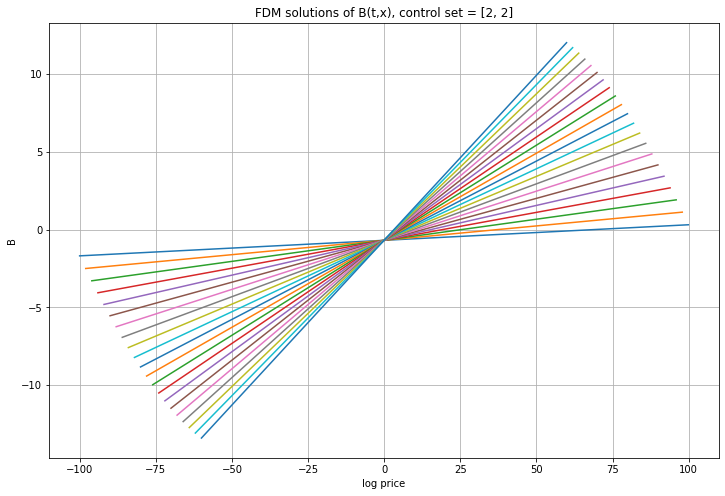

In [ ]:
fig0= plt.figure(figsize=(12,8))
for j in range(Nt, -1, -1):
    idx = np.arange(Nt - j, 2*Nx - (Nt - j))
    if j%20 ==0:
        plt.plot(dx*(idx-Nx), B[idx,j])
   
plt.grid(True)
plt.title("FDM solutions of B(t,x), control set = [2, 2]")
plt.xlabel("log price")
plt.ylabel("B")
# plt.savefig("Euler_1.png",bbox_inches='tight',dpi=300)
plt.show()

In [ ]:
#Compare solution of constant control and closed interval
B_cc = np.load("/content/drive/My Drive/Colab Notebooks/ODE_sol.npy")

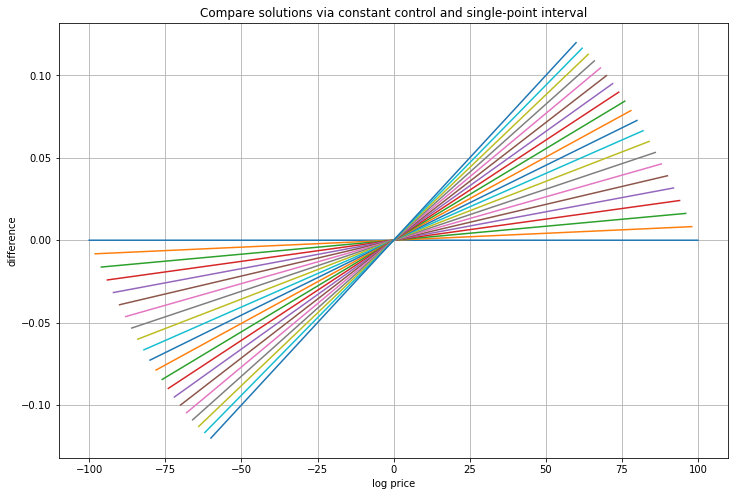

In [ ]:
comp = B - B_cc
fig1= plt.figure(figsize=(12,8))
for j in range(Nt, -1, -1):
    idx = np.arange(Nt - j, 2*Nx - (Nt - j))
    if j%20 ==0:
        plt.plot(dx*(idx-Nx), comp[idx,j])
   
plt.grid(True)
plt.title("Compare solutions via constant control and single-point interval")
plt.xlabel("log price")
plt.ylabel("difference")
# plt.savefig("Euler_1.png",bbox_inches='tight',dpi=300)
plt.show()